<a href="https://colab.research.google.com/github/Gabuni19/Codigos-Shorts/blob/main/DES_ModoCFB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [5]:
from Crypto.Cipher import DES
from Crypto.Random import get_random_bytes

def des_cfb_encrypt(key, input_file, output_file):
    iv = get_random_bytes(8)
    cipher = DES.new(key, DES.MODE_CFB, iv=iv)

    with open(input_file, 'rb') as file_in:
        with open(output_file, 'wb') as file_out:
            file_out.write(iv)  # Escribir el IV al principio del archivo cifrado

            while True:
                chunk = file_in.read(8)
                if len(chunk) == 0:
                    break
                elif len(chunk) % 8 != 0:
                    chunk += b' ' * (8 - len(chunk) % 8)  # Rellenar el último bloque si es necesario
                encrypted_chunk = cipher.encrypt(chunk)
                file_out.write(encrypted_chunk)

def des_cfb_decrypt(key, input_file, output_file):
    with open(input_file, 'rb') as file_in:
        iv = file_in.read(8)  # Leer el IV del archivo cifrado
        cipher = DES.new(key, DES.MODE_CFB, iv=iv)

        with open(output_file, 'wb') as file_out:
            while True:
                chunk = file_in.read(8)
                if len(chunk) == 0:
                    break
                decrypted_chunk = cipher.decrypt(chunk)
                file_out.write(decrypted_chunk)

def main():
    key = get_random_bytes(8)
    input_pptx = '09.pptx'
    encrypted_pptx = 'archivo_encrypted.pptx'
    decrypted_pptx = 'archivo_decrypted.pptx'

    # Cifrado
    des_cfb_encrypt(key, input_pptx, encrypted_pptx)
    print("Archivo cifrado y guardado como:", encrypted_pptx)

    # Descifrado
    des_cfb_decrypt(key, encrypted_pptx, decrypted_pptx)
    print("Archivo descifrado y guardado como:", decrypted_pptx)

if __name__ == "__main__":
    main()



Archivo cifrado y guardado como: archivo_encrypted.pptx
Archivo descifrado y guardado como: archivo_decrypted.pptx


## Pruebas de la generacion del archivo encriptado y desencriptado

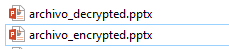

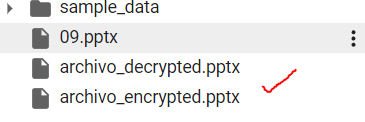